In [1]:
#引入各种所需要使用的数据包和图表包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import rcParams # 图大小
from sklearn.metrics import accuracy_score # 模型准确度
from sklearn.tree import plot_tree # 树图
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import datasets

In [2]:
data = pd.read_csv("decision_tree_traning_data_set.csv",encoding="unicode_escape")
data = pd.read_csv("decision_tree_traning_data_set.csv",encoding="gbk")
data


,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,2,A,铅钡,浅蓝,风化,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,3,A,高钾,蓝绿,无风化,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,4,A,高钾,蓝绿,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
4,5,A,高钾,蓝绿,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.27,NaN,NaN,0.94,0.06,NaN,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,C,铅钡,浅蓝,风化,12.41,NaN,NaN,5.24,0.89,2.25,0.76,5.35,59.85,7.29,NaN,0.64,NaN,NaN
65,66,A,铅钡,黑,风化,54.61,NaN,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,NaN,NaN
66,67,A,铅钡,黑,风化,17.98,NaN,NaN,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,NaN,NaN
67,68,C,铅钡,浅蓝,风化,21.35,NaN,NaN,5.13,1.45,2.51,0.42,0.75,51.34,NaN,8.75,NaN,NaN,NaN


In [3]:
#接下来进行构建决策树的必要数据初始化 
#定义类型高钾玻璃为0，铅钡玻璃为1
data.loc[data['类型']=='高钾','类型']='0'
data.loc[data['类型']=='铅钡','类型']='1'
data

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,0,蓝绿,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,2,A,1,浅蓝,风化,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,3,A,0,蓝绿,无风化,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,4,A,0,蓝绿,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
4,5,A,0,蓝绿,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.27,NaN,NaN,0.94,0.06,NaN,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,C,1,浅蓝,风化,12.41,NaN,NaN,5.24,0.89,2.25,0.76,5.35,59.85,7.29,NaN,0.64,NaN,NaN
65,66,A,1,黑,风化,54.61,NaN,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,NaN,NaN
66,67,A,1,黑,风化,17.98,NaN,NaN,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,NaN,NaN
67,68,C,1,浅蓝,风化,21.35,NaN,NaN,5.13,1.45,2.51,0.42,0.75,51.34,NaN,8.75,NaN,NaN,NaN


In [4]:
#将数据中的NaN转变为0方便后续构建决策树
data=data.fillna(value=0)
data

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,0,蓝绿,无风化,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,1,浅蓝,风化,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,0,蓝绿,无风化,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,4,A,0,蓝绿,无风化,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
4,5,A,0,蓝绿,无风化,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,C,1,浅蓝,风化,12.41,0.0,0.00,5.24,0.89,2.25,0.76,5.35,59.85,7.29,0.00,0.64,0.0,0.00
65,66,A,1,黑,风化,54.61,0.0,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,0.0,0.00
66,67,A,1,黑,风化,17.98,0.0,0.00,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,0.0,0.00
67,68,C,1,浅蓝,风化,21.35,0.0,0.00,5.13,1.45,2.51,0.42,0.75,51.34,0.00,8.75,0.00,0.0,0.00


In [5]:
#接下来进行构建决策树的必要数据初始化 
#定义类型高钾玻璃为0，铅钡玻璃为1
data.loc[data['表面风化']=='无风化','表面风化']='0'
data.loc[data['表面风化']=='风化','表面风化']='1'
data

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,0,蓝绿,0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,1,浅蓝,1,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,0,蓝绿,0,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,4,A,0,蓝绿,0,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
4,5,A,0,蓝绿,0,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,C,1,浅蓝,1,12.41,0.0,0.00,5.24,0.89,2.25,0.76,5.35,59.85,7.29,0.00,0.64,0.0,0.00
65,66,A,1,黑,1,54.61,0.0,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,0.0,0.00
66,67,A,1,黑,1,17.98,0.0,0.00,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,0.0,0.00
67,68,C,1,浅蓝,1,21.35,0.0,0.00,5.13,1.45,2.51,0.42,0.75,51.34,0.00,8.75,0.00,0.0,0.00


In [6]:
#将数据中的颜色\纹饰使用dummy分组
dummy_features = ["纹饰", "颜色"]
dummy_X = pd.get_dummies(data[dummy_features])
dummy_X

,纹饰_A,纹饰_B,纹饰_C,颜色_0,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑
0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,0,1,0,0,1,0,0,0,0,0,0
65,1,0,0,0,0,0,0,0,0,0,0,1
66,1,0,0,0,0,0,0,0,0,0,0,1
67,0,0,1,0,0,1,0,0,0,0,0,0


In [7]:
#观察图表三发现给了14个变量，为了让变量适配所以需要适当缩减决策树的因变量
features = data.iloc[:,5:]
features

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
4,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12.41,0.0,0.00,5.24,0.89,2.25,0.76,5.35,59.85,7.29,0.00,0.64,0.0,0.00
65,54.61,0.0,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,0.0,0.00
66,17.98,0.0,0.00,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,0.0,0.00
67,21.35,0.0,0.00,5.13,1.45,2.51,0.42,0.75,51.34,0.00,8.75,0.00,0.0,0.00


In [8]:
#提取数组形式
feature = features
features = features.values
features

array([[6.933e+01, 0.000e+00, 9.990e+00, 6.320e+00, 8.700e-01, 3.930e+00,
        1.740e+00, 3.870e+00, 0.000e+00, 0.000e+00, 1.170e+00, 0.000e+00,
        0.000e+00, 3.900e-01],
       [3.628e+01, 0.000e+00, 1.050e+00, 2.340e+00, 1.180e+00, 5.730e+00,
        1.860e+00, 2.600e-01, 4.743e+01, 0.000e+00, 3.570e+00, 1.900e-01,
        0.000e+00, 0.000e+00],
       [8.705e+01, 0.000e+00, 5.190e+00, 2.010e+00, 0.000e+00, 4.060e+00,
        0.000e+00, 7.800e-01, 2.500e-01, 0.000e+00, 6.600e-01, 0.000e+00,
        0.000e+00, 0.000e+00],
       [6.588e+01, 0.000e+00, 9.670e+00, 7.120e+00, 1.560e+00, 6.440e+00,
        2.060e+00, 2.180e+00, 0.000e+00, 0.000e+00, 7.900e-01, 0.000e+00,
        0.000e+00, 3.600e-01],
       [6.158e+01, 0.000e+00, 1.095e+01, 7.350e+00, 1.770e+00, 7.500e+00,
        2.620e+00, 3.270e+00, 0.000e+00, 0.000e+00, 9.400e-01, 6.000e-02,
        0.000e+00, 4.700e-01],
       [6.765e+01, 0.000e+00, 7.370e+00, 0.000e+00, 1.980e+00, 1.115e+01,
        2.390e+00, 2.510e+00, 2

In [9]:
#使用target是以高钾玻璃和铅钡玻璃的分类，需要用于决策树模型中的参数中
target = data['类型'].values
target

array(['0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1'], dtype=object)

In [10]:
#建立训练决策树模型
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))

X_train shape : (55, 14)
X_test shape : (14, 14)
y_train shape : (55,)
y_test shape : (14,)


In [11]:
decisiontree = DecisionTreeClassifier(random_state=0,criterion = 'entropy', max_depth = 4)

In [12]:
#测试决策树的准确性
decisiontree.fit(X_train, y_train)
 
pred_model = decisiontree.predict(X_test)
print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

Accuracy of the model is 100%


In [13]:
rcParams['figure.figsize'] = (15, 10)

In [14]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['lines.color'] = 'blue'

[Text(0.5, 0.75, '氧化铅(PbO) <= 5.46\nentropy = 0.946\nsamples = 55\nvalue = [20, 35]\nclass = 铅钡'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = 高钾'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]\nclass = 铅钡')]

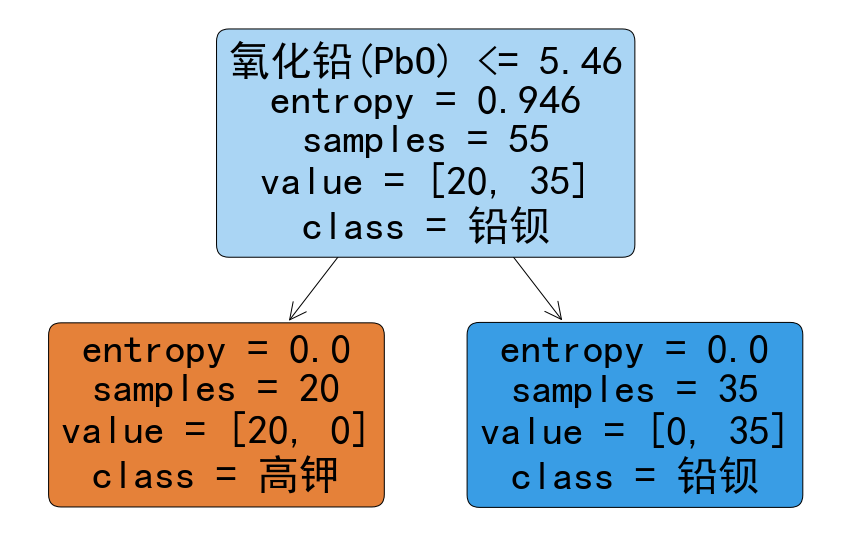

In [15]:
plot_tree(decisiontree, 
          feature_names = feature.columns, 
          class_names = ["高钾",'铅钡'], 
          filled = True, 
          rounded = True)

In [16]:
#此部分为推入附件.xlsx表三的数据进行预测的部分，前半部分为与decision_tree_model.ipynb完全相同的构建决策树的代码，第三题部分从此处开始看即可

In [17]:
# load C3 data
predict_set = pd.read_excel("test_data_set.csv")
predict_set


,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN
5,A6,风化,93.17,NaN,1.35,0.64,0.21,1.52,0.27,1.73,NaN,NaN,0.21,NaN,NaN,NaN
6,A7,风化,90.83,NaN,0.98,1.12,NaN,5.06,0.24,1.17,NaN,NaN,0.13,NaN,NaN,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [18]:
#数据初始化
predict_set=predict_set.fillna(value=0)
predict_set


,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [19]:
#保持数据集变量一致
features_test_data_set = predict_set.iloc[:,2:]
features_test_data_set

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
5,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
6,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
7,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [20]:
#代入模型检验
decisiontree.predict(features_test_data_set.values)

array(['0', '1', '1', '1', '1', '0', '0', '1'], dtype=object)

In [21]:
#创建一列新的列标明样品的属性为高钾玻璃或者是铅钡玻璃
predict_set["类型"]=decisiontree.predict(features_test_data_set.values)
predict_set

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51,0
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00,1
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00,1
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00,1
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00,1
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00,0
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11,0
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,1


In [23]:
#表格直观化
predict_set.loc[predict_set['类型']=='0','类型']='高钾'
predict_set.loc[predict_set['类型']=='1','类型']='铅钡'
predict_set

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51,高钾
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00,铅钡
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00,铅钡
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00,铅钡
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00,铅钡
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00,高钾
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11,高钾
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,铅钡
